# Effect Size, P-Values and Power - Lab

## Introduction 

In this lab, you'll run simulations to continue to investigate the relationship between effect size, p-values, power and sample size. To do this, you'll   

## Objectives
You will be able to:
* Describe how effect size, sample size and p_value are related to each other. 
* Use Welch's t-test for distributions that do not have a normality assumption.
* Plot visualisations to confirm the calculations and intuitions towards p_value and effect size. 
* Explain how with a same effect size, we may see different p_values with increasing number of simulations. 

## Philosophical Review

Remember that the underlying question behind all hypothesis tests is:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

This is exactly what a p-value represents: the chance that the observed data would satisfy the null hypothesis. As such, if the p-value is sufficiently low, you can declare the results statistically significant and reject the null hypothesis. Recall that this threshold is defined as $\alpha$, and is also the rate of type I errors. In this lab, you'll investigate the robustness of p-values and their relation with effect-size and sample-size. 

# Import Starter Functions

To start, import the functions stored in the `flatiron_stats.py` file. It contains the stats functions that you previously coded in the last lab: `welch_t(a,b)`, `welch_df(a, b)` and `p_value(a, b, two_sided=False)`. You'll then use these functions below to further investigate the relationship between p-values and sample size.

In [4]:
#Your code here; import the contents from flatiron_stats.py
#You may also wish to open up flatiron_stats.py in a text editor to preview its contents.
from flatiron_stats import *

## Generating Random Samples

Before you start running simulations, it will be useful to have a helper function that will generate random samples. Write such a function below which generates 2 random samples from 2 normal distributions. The function should take 6 input parameters:

* m1 - The underlying population mean for sample 1
* s1 - The underlying population standard deviation for sample 1
* n1 - The sample size for sample 1

* m2 - The underlying population mean for sample 2
* s2 - The underlying population standard deviation for sample 2
* n2 - The sample size for sample 2

In [5]:
import numpy as np
def generate_samples(m1,s1,n1,m2,s2,n2):
    #Your code here
    sample1 = np.random.normal(loc=m1, scale=s1, size=n1)
    sample2 = np.random.normal(loc=m2, scale=s2, size=n2)
    return sample1, sample2

## Running a Simulation

For your first simulation, you're going to investigate how the p-value of an experiment relates to sample size when both samples are from identical underlying distributions. To do this, use your `generate_samples()` function along with the `p_value_welch_ttest()` function defined in the flatiron_stats file. Use sample sizes from 5 to 5000. For each sample size, simulate 10,000 experiments. For each of these experiments, generate 2 samples of the given sample size, each with a mean of 5 and a standard deviation of 1. Calculate the corresponding p-values for a Welch's t-test for each of these sample-pairs. Finally, store all 10,000 of these p-values along with their corresponding sample size. 

In [6]:
import pandas as pd

In [19]:
n_vs_p = {}
for n in range(5,5005,5):
    temp = []
    for i in range(10**4):
        sample1, sample2 = generate_samples(m1=5, s1=1, n1=n, m2=5, s2=1, n2=n)
        p = p_value_welch_ttest(sample1, sample2)
        temp.append(p)
    n_vs_p[n] = temp
df = pd.DataFrame.from_dict(n_vs_p) 
df

,5,10,15,20,25,30,35,40,45,50,...,4955,4960,4965,4970,4975,4980,4985,4990,4995,5000
0,0.114858,0.225780,0.184541,0.023004,0.136535,0.474732,0.246251,0.008014,0.045742,0.276221,...,0.320563,0.093427,0.359169,0.057506,0.295422,0.419694,0.312001,0.161778,0.146389,0.243631
1,0.107518,0.289804,0.166036,0.168630,0.425122,0.361368,0.444858,0.285630,0.341772,0.214734,...,0.069012,0.183049,0.324486,0.289466,0.432983,0.145880,0.171273,0.231472,0.089274,0.034726
2,0.101484,0.154497,0.296421,0.108977,0.180490,0.121559,0.078134,0.058508,0.371425,0.156752,...,0.223777,0.342147,0.287711,0.392367,0.008451,0.391506,0.234037,0.100587,0.182217,0.458477
3,0.150230,0.207533,0.486753,0.116937,0.309638,0.239450,0.308371,0.333574,0.349605,0.115435,...,0.193887,0.164900,0.255469,0.294494,0.151002,0.148370,0.261621,0.215301,0.468064,0.388551
4,0.440121,0.280969,0.162513,0.144875,0.276414,0.213804,0.375926,0.330105,0.370874,0.328820,...,0.115081,0.074749,0.294784,0.123185,0.368410,0.494228,0.099280,0.497153,0.301893,0.388507
5,0.469730,0.135150,0.149539,0.313661,0.399098,0.182035,0.429303,0.461018,0.399955,0.080824,...,0.396749,0.167838,0.421600,0.217456,0.367965,0.329645,0.309522,0.082679,0.010959,0.496828
6,0.066777,0.453294,0.398427,0.099709,0.326128,0.232553,0.251274,0.302913,0.252934,0.184063,...,0.067361,0.099187,0.248965,0.360580,0.267872,0.136599,0.187469,0.467630,0.442827,0.270327
7,0.220418,0.175790,0.084153,0.053748,0.002785,0.313984,0.036666,0.341114,0.319663,0.365298,...,0.117277,0.365157,0.088565,0.011923,0.290223,0.114080,0.382380,0.490774,0.426432,0.377895
8,0.322582,0.020165,0.127246,0.011151,0.180162,0.050520,0.479191,0.121253,0.083359,0.247707,...,0.093393,0.024292,0.271352,0.045134,0.192573,0.085973,0.482460,0.366383,0.269380,0.488725
9,0.096211,0.008377,0.098663,0.374167,0.228272,0.463920,0.451042,0.291125,0.397267,0.125357,...,0.353278,0.181403,0.366467,0.394625,0.222295,0.393405,0.027650,0.267931,0.115542,0.497577


In [20]:
df.to_csv('p-value-simulations-for-identical-normal-distributions-and-varying-sample-size.csv', index=False)

In [23]:
%matplotlib inline

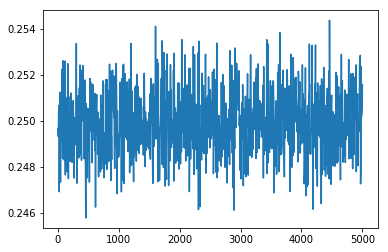

In [24]:
df.mean().plot()

In [36]:
p_vs_e_n = {}
for effect_size in [0.01,.1,.2, .5, 1, 2]:
    n_vs_p = {}
    for n in range(5,750,5):
        p_vals = []
        for i in range(100):
            sample1, sample2 = generate_samples(m1=5, s1=1, n1=n, m2=5+effect_size, s2=1, n2=n)
            p = p_value_welch_ttest(sample1, sample2)
            p_vals.append(p)
        n_vs_p[n] = np.mean(p_vals)
    p_vs_e_n[effect_size] = n_vs_p

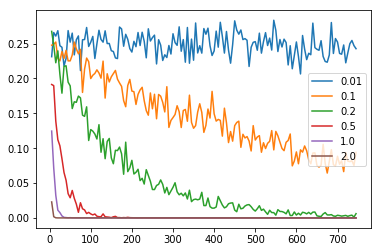

In [37]:
df = pd.DataFrame.from_dict(p_vs_e_n)
df.plot()
plt.title('Power vs Sample Size for Varying Effect sizes')
plt.xlabel('Sample Size')
ply.ylabel('Power')

In [35]:
df.head(150)

,0.2,0.5,1.0,2.0
5,0.242891,2.232280e-01,1.272707e-01,2.561347e-02
10,0.255934,1.916927e-01,6.961595e-02,2.050308e-03
15,0.237548,1.782123e-01,1.966554e-02,1.110364e-04
20,0.206330,1.282212e-01,1.268444e-02,8.968534e-06
25,0.225637,9.990318e-02,9.214690e-03,2.308070e-06
30,0.192584,6.582977e-02,2.691906e-03,1.788669e-08
35,0.178504,5.757936e-02,2.803232e-03,1.279791e-08
40,0.188674,7.779345e-02,4.303528e-04,1.030092e-10
45,0.161429,4.261321e-02,2.845029e-04,3.876338e-12
50,0.194561,3.531266e-02,2.382991e-04,4.241405e-12


In [30]:
df.to_csv('p_value_vs_effect_size.csv')

### P_Value and Sample Size

Let's now explore how the p-value depeands on sample size and effect size. AWe will take the effect size as the difference in means between two samples from normal distributions with variances of one. 

Let's write a function to run an experiment with N (sample size), effect size (difference in means) and return the p_value using functions created earlier. 

In [16]:
def p_experiment(N, effect=1):
    
    control = np.random.randn(N)
    treatment = np.random.randn(N) + effect # Add effect to treatment group
    
    t, p = p_value(control, treatment)

    return p


Using the given values of M and N below, run the above function for effect sizes [0.2, 0.5, 1]. Store the values in an array using formula 

`ps = np.array([sum(simulate_experiment(N, effect_size) for m in range(M))/M for N in Ns])`

In [17]:
nobs = np.linspace(2,300).astype(int) # A range of sample sizes to iterate over
M = 1000 # Number of simulations; run 1000 simulations for each sample size/effect size combination in order to converge on an average p-value

for e_size in [0.2,0.5,1]:
    
    p1 = np.array([sum(p_experiment(N, 0.2) for m in range(M))/M for N in Ns])
    p2 = np.array([sum(p_experiment(N, 0.5) for m in range(M))/M for N in Ns])
    p3 = np.array([sum(p_experiment(N, 1) for m in range(M))/M for N in Ns])

For each chosen effect size i.e. .2, .5 and 1, show the effect of sample size on averaged p_value calculated above. An example plot may look like:
![](images/p-sample-eff.png)

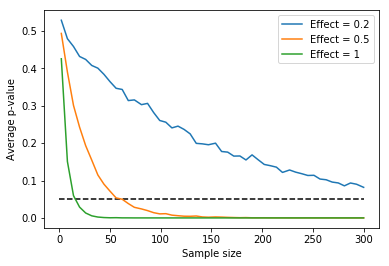

In [18]:
# Plot the graph similar to one shown above
plt.plot(Ns, p1, label="Effect = 0.2")
plt.plot(Ns, p2, label="Effect = 0.5")
plt.plot(Ns, p3, label="Effect = 1")
plt.hlines(0.05, 0, 300, linestyles='--', color='k')
plt.ylabel("Average p-value")
plt.xlabel("Sample size")
plt.legend()


What we see here is that the p-value is a function of the sample size. This means that regardless of effect size, if you have a large amount of data, you will get a significant p-value. It also means that if you don't have a significant p-value, an effect isn't rejected, you just can't see it through the noise.

### P_Value and Effect Size

We shall now look at how the p-values depend on effect size. We shall simulate experiments to see the distribution of p-values we get with changing effect sizes (as compared to fixed effect size previously).

Use the effect sizes [0.1, 0.25, 0.5, 0.75] with a sample size N = 100 and number of simulations -  M = 10000. Plot a hoistogram of p_values calculated for each effect size. The output may look similar to:
![](images/p_eff.png)


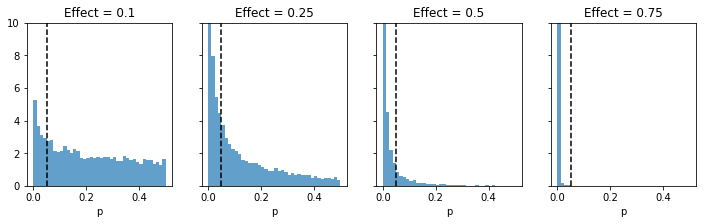

In [19]:
fig, axes = plt.subplots(figsize=(12,3), ncols=4, sharey=True)
effect_sizes = [0.1, 0.25, 0.5, 0.75]

effects = [[p_experiment(100, effect=e) for m in range(10000)] for e in effect_sizes]

for i, ps in enumerate(effects):
    ax = axes[i]
    ax.hist(ps, range=(0, 0.5), bins=40, normed=True, alpha=0.7)
    ax.vlines(0.05, 0, 100, color='k', linestyles='--')
    ax.set_title('Effect = {}'.format(effect_sizes[i]))
    ax.set_xlabel('p')
    ax.set_ylim(0, 10)

It can be seen from the second set of simulations with an effect of 0.25, that If this same experiment were replicated in multiple labs in multiple locations, the chance that one particular experiment would find a statistically significant effect is about the same as getting heads from a coin flip. 

In [20]:
for i, each in enumerate(effects):
    print('Effect = {}, P(p < 0.05): {}'.\
          format(effect_sizes[i], (np.array(each) < 0.05).mean()))


Effect = 0.1, P(p < 0.05): 0.1114
Effect = 0.25, P(p < 0.05): 0.4225
Effect = 0.5, P(p < 0.05): 0.9396
Effect = 0.75, P(p < 0.05): 0.9995


## Summary

This lesson summarizes and further builds upon the ideas that we saw in the previous labs. We learnt how p_value can be described as a function of effect size and for a given effect size, the p_value may get lower if we increase the sample size considerably. We also saw how p_value alone can not be used in order to identify some results as truly siginifcant, as this can be achieved when there is not a significant effect size. 